As we saw in the previous notebook, the eigenvalue density plays a key role in the development of the random matrix theory, now we face a non-intuitive situation.

The problem with random matrices is we cannot expect that the sum (or product)of matrices implies the sum (or product) of their eigenvalues. The addition of random matrices leads to the theory of so-called 'free matrices'.

Two large matrices are 'free' if their eigenbasis are related by a random rotation, i.e., $\mathbf{A}$ and $\mathbf{OBO}^{\intercal}$ are free when $\mathbf{O}$ is a random rotation matrix.

In particular, a 'large' matrix drawn from a rotationally invariant ensemble is free with respect to any matrix independent of it, for example a deterministic matrix. 

Are we screwed then? Not really, there are many clever people out here and this problem is already solved.

First we define the R-transform as

\begin{align*}
    R(x) = z(x) - \frac{1}{x}
\end{align*}

where $z(x)$ is the inverse function of $x$.
The R-transform has the additive property:

\begin{align*}
    R_{A+B}(x) = R_{A}(x) + R_{B}(x) 
\end{align*}

For the case of the product, we introduce the so-called S-transform, which is the counterpart of the R-transform for products of free variables. 

To define the S-transform, we first introduce the T-transform as

\begin{align*}
    \mathrm{t}_{A}(\zeta) = \tau\left[(1-\zeta^{-1}A)^{-1}\right]-1 = \zeta g_{A}(\zeta) - 1
\end{align*}

Where $g_{A}(\zeta)$ is the Stieltjes transform of A and $\zeta \in \mathbb{C}$. It is possible to recover the eigenvalue density using the following T-version of the Sokhotski–Plemelj formula:

\begin{align*}
    \rho(\lambda) = \frac{1}{\pi}\lim_{\eta \rightarrow 0^{+}} \frac{\text{Im }\mathrm{t}(x-i\eta)}{x}
\end{align*}

We define $\zeta_{A}(t)$ to be the inverse function of $\mathrm{t}_{A}(\zeta)$. We then define the S-transform as:

\begin{align*}
    S_{A}(t) = \frac{t+1}{t\zeta_{A}(t)}
\end{align*}

The S-Transform has the following property:

\begin{align*}
    S_{AB}(t) = S_{A}(t)S_{B}(t)
\end{align*}

Quick note, the form $AB$ is not very useful since it is not necessarily symmetric even if $A$ and $B$ are. If $A$ is a positive semi-defined symmetric and $B$ is symmetric then we call $A^{1/2}BA^{1/2}$ the free product of $AB$.

A recipe to compute the eigenvalue density for the multiplicative case $C = A^{1/2}BA^{1/2}$ 

1.- Find $\mathrm{t}_{A}(\zeta)$ and $\mathrm{t}_{B}(\zeta)$

2.- Invert $\mathrm{t}_{A}(\zeta)$ and $\mathrm{t}_{B}(\zeta)$ to get $\zeta_{A}(t)$ and $\zeta_{B}(t)$ and hence $S_{A}(t)$ and $S_{B}(t)$

3.- Compute $S_{C}(t) = S_{A}(t)S_{B}(t)$, which gives $t\zeta_{C}(t)= \frac{t+1}{S_{C}(t)}$

4.-Find the inverse $\mathrm{t}_{C}{\zeta}$

5.-And the final step, use the T-version of the Sokhotski–Plemelj formula.

Numerically some problems may arise owing to the fact that we don't know the shape of the functions to invert. 


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

A quick recap on the Wishart matrices. Given a data matrix $\mathbf{H}$ of size $N \times T$ whose entries are idd gaussian random variables with mean zero and variance $\sigma^{2}$ we compute the Wishart matrix as:

\begin{align*}
    \mathbf{W} = \frac{1}{T}\mathbf{HH}^{\intercal}
\end{align*}

and its eigenvalue density is given by

\begin{align*}
    \rho_{MP} = \frac{1}{2\pi q x} \sqrt{\left[(\lambda_{+}-x)(x-\lambda_{-})\right]_{+}} + \frac{q-1}{q}\delta(x)\Theta(q-1)
\end{align*}

Where we denote, $q = N/T$,  $[a] = \text{max}\{a,0\}$ $\forall a \in \mathbb{R}$ and

\begin{align*}
    \Theta(q-1) = \begin{cases}0 & \text{if }q\leq  1\\1 & \text{if }q >  1\end{cases}
\end{align*}

In [ ]:
def mp(N, T, n = 100):
  q = N/T
  xp = (1 + np.sqrt(q))*(1 + np.sqrt(q))
  xm = (1 - np.sqrt(q))*(1 - np.sqrt(q))
  x = np.linspace(xm, xp , n)
  rho = np.sqrt((xp-x)*(x-xm))/(2*np.pi*q*x)
  return x, rho

In [ ]:
N0 = 100
T = 200
N = [50, 100, 150]

<ipython-input-2-f04e18538da8>:6: RuntimeWarning: invalid value encountered in true_divide
  rho = np.sqrt((xp-x)*(x-xm))/(2*np.pi*q*x)


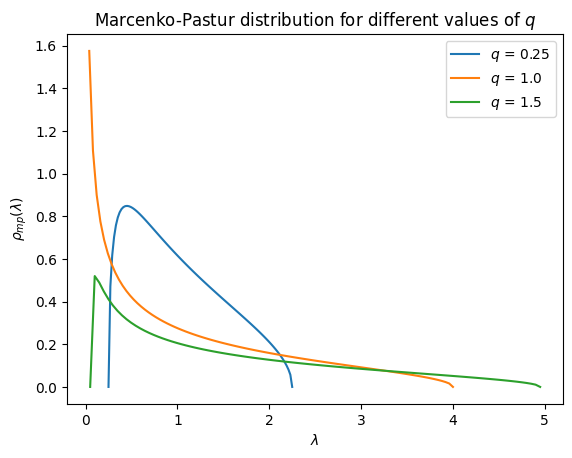

In [ ]:
for n in [50, 200, 300]:
  xmp, ymp = mp(N = n, T = T)
  plt.plot(xmp, ymp, label = '$q$ = '+ str(n/T))

  plt.legend(loc = 'best')
plt.title('Marcenko-Pastur distribution for different values of $q$')  
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho_{mp}(\lambda)$') 
plt.show()

Numerically we can obtein an approximation of the density using the definition of the Stieltjes transform

\begin{align*}
    g(x-i\eta) = \frac{1}{N}\sum_{j}^{N}\frac{1}{x - i\eta - \lambda_{j}}
\end{align*}

and then the Sokhotski - Plemelj formula

\begin{align*}
    \rho(x) = \frac{1}{\pi}\lim_{\eta \rightarrow 0^{+}}\text{Im}g(x - i\eta)
\end{align*}

In practice $\eta \sim 1/\sqrt N$ or even $\eta = 0$.

In [ ]:
def stieljes(eval): 
  N = len(eval)
  eta = 1/np.sqrt(N)
  enew = np.sort(eval)
  #enew = eval[::-1]
  g = 0 - 0*1j
  for ev in eval:
    g += 1/(-ev + enew  - eta*1j )
  return enew, g/(N*np.pi)  

In [ ]:
xmp0, ymp0 = mp( N0, T)
H0 = np.random.normal(0,1, size = (N0,T))
W0 = (1/T)*H0@H0.T
u0, __ = np.linalg.eig(W0)

In [ ]:
z, g = stieljes(eval = u0)

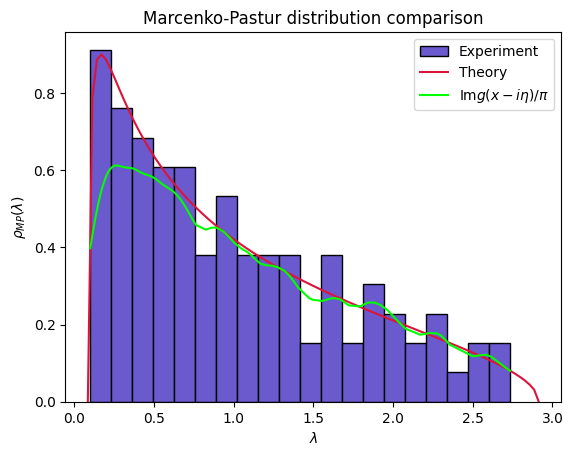

In [ ]:
plt.hist(u0, bins = 20, ec = 'black', color = 'slateblue', density = True, label = 'Experiment')
plt.plot(xmp0, ymp0, color = 'crimson', label = 'Theory')
plt.plot(z, np.imag(g), color = 'lime', label = 'Im$g(x - i\eta)/\pi$')
plt.title('Marcenko-Pastur distribution comparison')
plt.legend(loc = 'best')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho_{MP}(\lambda)$')
plt.show()

The free product of two Wishart matrices $E = (W_{q0})^{\frac{1}{2}}W_{q}(W_{q0})^{\frac{1}{2}}$ .

For a Wishart matrix with parameter $q = N/T$ it can be proven that the S-Transform is given by: 
\begin{align}
    S_{W_{q}}(t) = \frac{1}{1 + qt}
\end{align}

Then the product is:

\begin{align*}
    S_{E}(t) = S_{W_{q}}(t)S_{w_{q0}}(t) =  \frac{1}{1 + qt}  \frac{1}{1 + q_{0}t}
\end{align*}

In [ ]:
Hq  = np.random.normal(0,1,size = (N[1],T))
Wq  = (1/T)*Hq@Hq.T
E = np.real(sp.linalg.sqrtm(W0)@Wq@sp.linalg.sqrtm(W0))
uE, _ = np.linalg.eig(E)

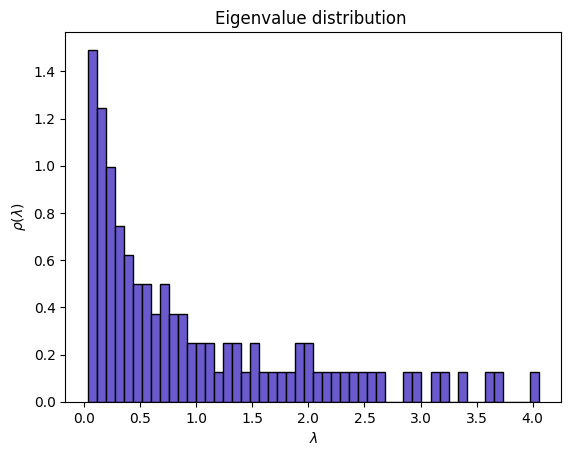

In [ ]:
plt.hist(uE, bins = 50, ec = 'black', color = 'slateblue', density = True)
plt.title('Eigenvalue distribution ')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.show()

finding $\mathrm{t}_{E}(\zeta)$

\begin{align*}
    S_{E}(t) = \frac{t+1}{t\zeta_{E}(t)} \Rightarrow t\zeta_{E}(t)= \frac{t+1}{S_{E}(t)}
\end{align*}

then

\begin{align*}
    qq_{0}t^{3} + (q + q_{0} + qq_{0})t^{2} + (q + q_{0} + 1 - \zeta)t + 1 = 0
\end{align*}


In [ ]:
def polyroots(zeta,eta = 0,q = 1, q0 = 1, p = 0):
  x3 = q*q0
  x2 = q + q0 + q*q0
  x1 = q + q0 + 1 
  x0 = 1
  root = []
  for zz in zeta:
    r = np.roots([x3, x2 + (zz - 1*1j*eta)*p, x1 - (zz - 1*1j*eta), x0])
    root.append(r)
  #return np.ravel(root)
  return np.array(root)


suppose w.l.o.g $q_{0} = 0$

\begin{align*}
    qt^{2} + (q + 1 - \zeta)t +1 = 0
\end{align*}

solving for t:

\begin{align*}
    \mathrm{t}(\zeta) = \frac{\zeta -q -1 \pm \sqrt{(\zeta - q -1)^{2} - 4q}}{2q} 
\end{align*}

notice that we recover the Marcenko-Pastur distribution.

In [ ]:
t0 = polyroots(zeta = z, eta = 1/np.sqrt(N0), q = 0, q0 = 1/2)

In [ ]:
t0.shape

(100, 2)


and then 
\begin{align*}
    \rho(\lambda) = \frac{1}{\pi}\lim_{\eta \rightarrow 0^{+}} \frac{\text{Im }\mathrm{t}(x-i\eta)}{x}
\end{align*}

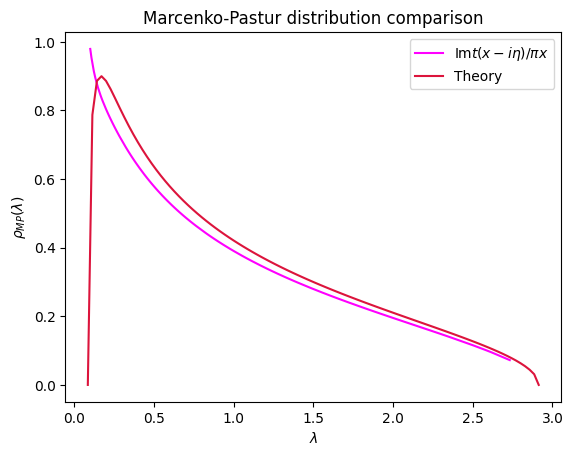

In [ ]:
plt.plot(z, np.imag(t0[:,1])/(np.pi*z), color = 'magenta',label = 'Im$t(x - i\eta)/\pi x$')
plt.plot(xmp0, ymp0, color = 'crimson', label = 'Theory')
plt.title('Marcenko-Pastur distribution comparison')
plt.legend(loc = 'best')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho_{MP}(\lambda)$')

plt.show()

When $q \neq 0$

\begin{align*}
    qq_{0}t^{3} + (q + q_{0} + qq_{0})t^{2} + (q + q_{0} + 1 - \zeta)t + 1 = 0
\end{align*}

We compute three different cases, 1.- $q = 1/4$, 2.- $q = 1/2$ and 3.- $q = 3/4$

In [ ]:
xtest = np.linspace(0,5)

In [ ]:
t01 = polyroots(zeta = xtest, eta = 1/np.sqrt(N[0]), q = N[0]/T, q0 = N0/T)

In [ ]:
t01.shape

(50, 3)

<ipython-input-18-d0e24553d82e>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xtest, np.imag(t01[:,2])/(np.pi*xtest), color = 'magenta')


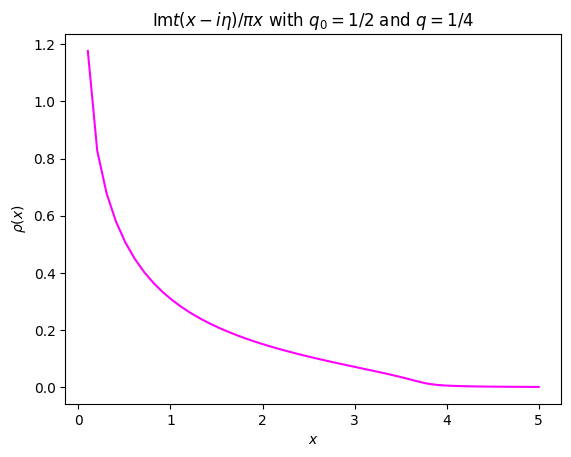

In [ ]:
#for i in range(3):

plt.plot(xtest, np.imag(t01[:,2])/(np.pi*xtest), color = 'magenta')
plt.title('Im$t(x - i\eta)/\pi x$ with $q_{0} = 1/2$ and $q=1/4$')
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.show()

In [ ]:
uEnew = np.sort(uE)

In [ ]:
t02 = polyroots(zeta = uEnew, eta = 1/np.sqrt(N[1]), q = N[1]/T, q0 = N0/T)

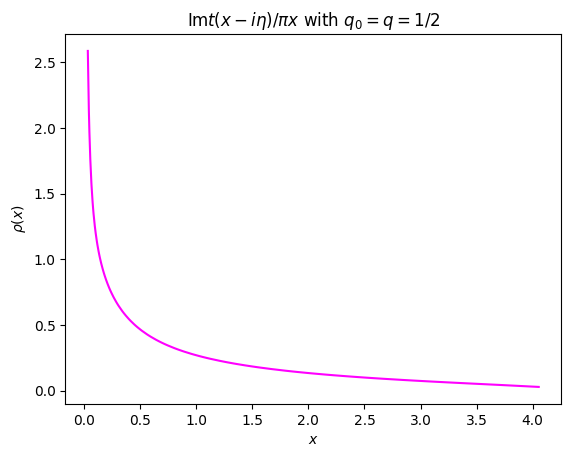

In [ ]:
#for i in range(3):
plt.plot(uEnew, np.imag(t02[:,2])/(np.pi*uEnew), color = 'magenta')
plt.title('Im$t(x - i\eta)/\pi x$ with $q_{0}  = q = 1/2$')
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.show()

In [ ]:
t03 = polyroots(zeta = xtest, eta = 1/np.sqrt(N[2]), q = N[2]/T, q0 = N0/T)

<ipython-input-23-cef3bae9f17a>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xtest, np.imag(t03[:,2])/(np.pi*xtest), color = 'magenta')


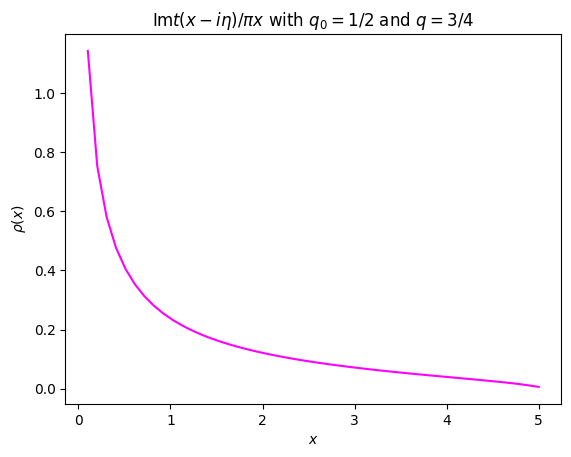

In [ ]:
#for i in range(3):
plt.plot(xtest, np.imag(t03[:,2])/(np.pi*xtest), color = 'magenta')
plt.title('Im$t(x - i\eta)/\pi x$ with $q_{0} = 1/2$ and $q=3/4$')
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.show()

And now the free product $E = (W_{q0})^{\frac{1}{2}}W_{q}(W_{q0})^{\frac{1}{2}}$ for $q_{0}  = q = 1/2$.

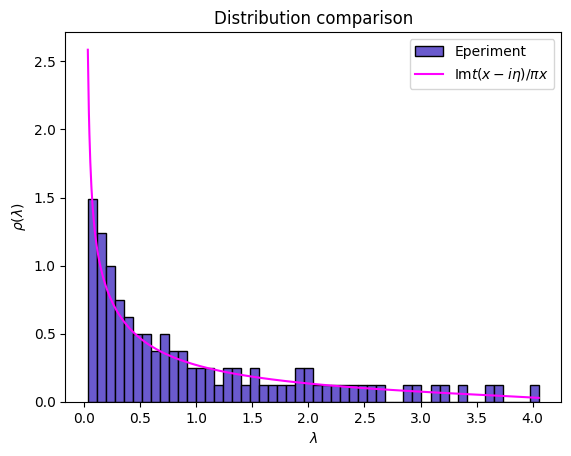

In [ ]:
plt.hist(uE, bins = 50, ec = 'black', color = 'slateblue', density = True, label = 'Eperiment')
plt.plot(uEnew, np.imag(t02[:,2])/(np.pi*uEnew), color = 'magenta', label = 'Im$t(x - i\eta)/\pi x$')
plt.title('Distribution comparison')
plt.legend(loc = 'best')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.show()

Free product of a Wishart and an Inverse-Wishart $\mathbf{E} = (\mathbf{M}_{p})^{\frac{1}{2}}\mathbf{W}_{q}(\mathbf{M}_{p})^{\frac{1}{2}}$.

The name says it all, the inverse Wishart is given by: 

$\mathbf{M}_{p} = (1-q)\mathbf{W}_{q}^{-1}$ (where $1-q$ is a normalization factor) and we define $p = q/(1 -q)$.

The S-Transform for the Inverse-Wishart is:

\begin{align*}
    S_{\mathbf{M}_{p}}(t)= 1 - pt 
\end{align*}



In [ ]:
class inverse_wishart(object):
  def __init__(self, n, t ):
    self.n = n
    self.t = t
    self.q = (n/t)
    self.p = (self.q)/(1-self.q)

  #def wishart(self):
    H = np.random.normal(0,1, size =(self.n,self.t))  
    self.W = (1/self.t)*(H@H.T)
  #return self.W

  def inverse(self):
    self.IW = (1-self.q)*np.linalg.inv( self.W )
    return self.IW

#def norma_trace(A):
#  return (1/A.shape[0])*np.trace(A)  



In [ ]:
Np = 100
Tp = 500

In [ ]:
Wp = inverse_wishart(n = Np, t = Tp)
Mp = Wp.inverse()

In [ ]:
Mp.shape

(100, 100)

In [ ]:
Wp.p

0.25

In [ ]:
#print(norma_trace(Mp))
#print(norma_trace(Mp@Mp))


1.0101411716016433
1.2750863722993004


In [ ]:
up, _ = np.linalg.eig(Mp)

In [ ]:
zMp, gMp = stieljes(eval = up)
#xiw, yip = inv_dist(N = Np, T = Tp)

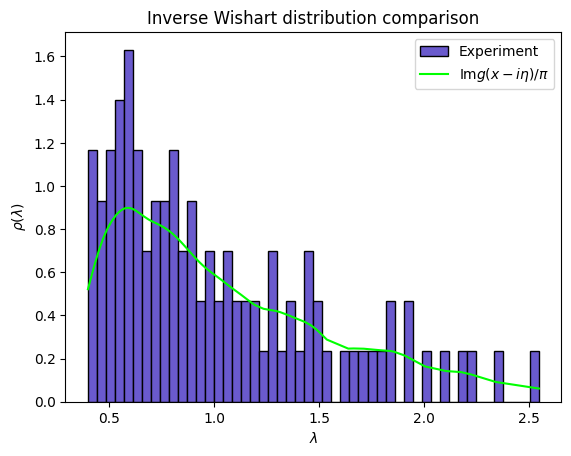

In [ ]:
plt.hist(up, bins = 50, ec = 'black', color = 'slateblue', density = True, label = 'Experiment')
plt.plot(zMp, np.imag(gMp), color = 'lime', label = 'Im$g(x - i\eta)/\pi$')
plt.title('Inverse Wishart distribution comparison')
plt.legend(loc = 'best')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.show()

Computing $S_{E}(t)$

\begin{align*}
    S_{\mathbf{E}}(t) =  S_{\mathbf{M}_{p}}(t)  S_{\mathbf{W}_{q}}(t) = \frac{1-pt}{1+qt}
\end{align*}

Then 

\begin{align*}
    \zeta_{E}(t)= \frac{t+1}{tS_{E}(t)} = \frac{(t+1)(1+qt)}{t(1-pt)}
\end{align*}

Solving for $\mathrm{t}$

\begin{align*}
    (t+1)(1+qt) = \zeta t(1-pt) \\
    (q + \zeta p)t^{2} + (q + 1 - \zeta)t + 1= 0
\end{align*}

\begin{align*}
    \mathrm{t}(\zeta) = \frac{\zeta -q -1 \pm \sqrt{(\zeta - q -1)^{2} - 4(q+\zeta p)}}{2(q + \zeta p)} 
\end{align*}

In [ ]:
Nq = Np
Tq = 400

In [ ]:
q = Nq/Tq

In [ ]:
q

0.25

In [ ]:
Hq = np.random.normal(0,1, size = (Nq, Tq))
Wq = (1/Tp)*Hq@Hq.T

In [ ]:
Wq.shape

(100, 100)

In [ ]:
Epq = (sp.linalg.sqrtm(Mp)@Wq)@sp.linalg.sqrtm(Mp)


0.8108631653748257
0.9865970972546567



\begin{align*}
    \rho_{E}(\lambda) = \frac{1}{2\pi \lambda(p\lambda+q)} \sqrt{4(p\lambda+q) - (1-q-\lambda)^{2}} 
\end{align*}

$\lambda_{\pm}  = 1+q+2p\pm 2\sqrt{(1+p)(q+p)}$ Notice if $p = 0$ the $\mathbf{M}_{p} = \mathbf{1}$ and we recover the Marcenko-Pastur distribution

In [ ]:
def E_dist(p,q, n = 100):
  xm = 1 + q + (2*p) - (2*np.sqrt((1+p)*(q+p)))
  xp = 1 + q + (2*p) + (2*np.sqrt((1+p)*(q+p)))
  x = np.linspace(xm, xp , n)
  rho = np.sqrt(4*(q+ p*x) - (1-q-x)**2)/(2*np.pi*x*(q+p*x))
  return x, rho


In [ ]:
uEpq, vEpq = np.linalg.eig(Epq)

In [ ]:
uEpqnew = np.sort(uEpq)

In [ ]:
tEpq = polyroots(zeta = uEpqnew, eta = 1/np.sqrt(Np), q = (Nq/Tq), q0 = 0, p = Wp.p)

In [ ]:
xe, ye = E_dist(p = 0.25, q = 0.25)

<ipython-input-50-a7eab338662d>:5: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(4*(q+ p*x) - (1-q-x)**2)/(2*np.pi*x*(q+p*x))


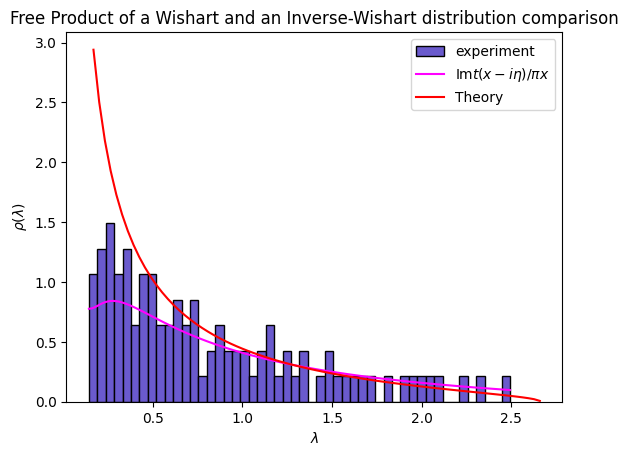

In [ ]:
plt.hist(uEpq, bins = 50, ec = 'black', color = 'slateblue', density = True, label = 'experiment')
plt.plot(xe, ye, color = 'red', label = 'Theory')
plt.plot(uEpqnew, np.imag(tEpq[:,1])/(np.pi*uEpqnew), color = 'magenta', label = 'Im$t(x - i\eta)/\pi x$')
plt.title('Free Product of a Wishart and an Inverse-Wishart distribution comparison')
plt.legend(loc = 'best')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.show()

In [1]:
#xi = vEpq.T@Mp@vEpq

In [2]:
#plt.scatter( np.diag(xi), uEpq, color = 'slateblue', alpha = 0.7)
#plt.show()

In [ ]:
#E = 0
#for i in range(t):
#  E += ( gamma*(1-gamma)**(-i) )* (xt[:,i, np.newaxis]@xt[:,i, np.newaxis].T)

In [ ]:
#E.shape

In [ ]:
#uE, _ = np.linalg.eig(E)
#uE = uE/np.sqrt(N)

In [ ]:
#plt.hist( uE, bins = 50, color = 'blue', ec = 'black', density = True,label = 'experiment')
#plt.plot(xsm2, ysm2, color = 'red', label = 'Theory')
#plt.title('Wigner semicircle')
#plt.xlabel('$\lambda$')
#plt.ylabel('$\\rho(\lambda)$')
#plt.legend(loc = 'best')
#plt.show()